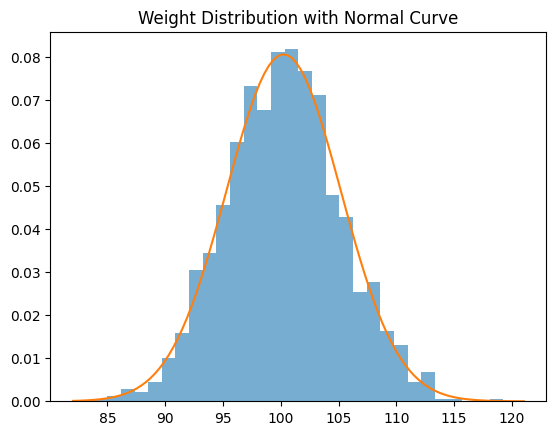

Mean: 100.24524773580822
Median: 100.2520148903325


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate synthetic dataset (1500 records)
np.random.seed(42)
data = np.random.normal(100, 5, 1500)

df = pd.DataFrame({
    "batch_id": np.random.randint(1, 21, 1500),
    "part_id": range(1, 1501),
    "weight": data,
    "machine_id": np.random.randint(1, 6, 1500),
    "shift": np.random.choice(["A", "B", "C"], 1500)
})

# Histogram
plt.hist(df["weight"], bins=30, density=True, alpha=0.6)

# Overlay normal curve
mean = df["weight"].mean()
std = df["weight"].std()

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p)

plt.title("Weight Distribution with Normal Curve")
plt.show()

print("Mean:", mean)
print("Median:", df["weight"].median())

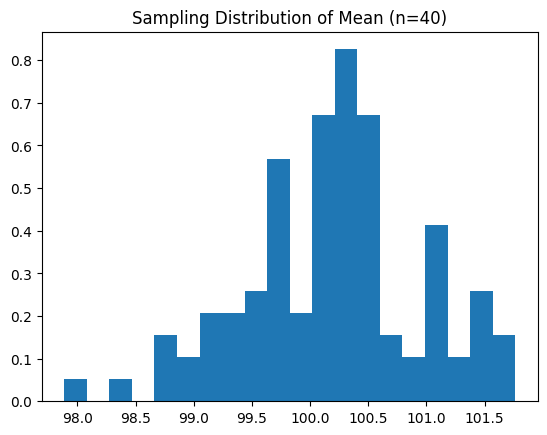

In [2]:
sample_means = []

for i in range(100):
    sample = df["weight"].sample(40)
    sample_means.append(sample.mean())

plt.hist(sample_means, bins=20, density=True)
plt.title("Sampling Distribution of Mean (n=40)")
plt.show()

In [3]:
df["z_score"] = (df["weight"] - mean) / std

defective = df[np.abs(df["z_score"]) > 2.5]

print("Defective parts count:", len(defective))

Defective parts count: 20
